In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import preprocessing,decomposition
from scipy import stats
import json
import ast
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA

# Data Loading

In [2]:
#df.to_csv('ZY_MisClass_V8_restreint.csv', index=False)

In [38]:
df1.to_csv('ZY_MisClass_V10_SEN_POST.csv', index=False)

In [3]:
df_mca= pd.read_csv(r"C:\Users\LENOVO\Desktop\Payroll_PFE\2. Data Analysis\MCA\MisClassification\MisCl_postes_V6_EN.csv")
df_mca = df_mca.drop(df_mca.columns[0], axis=1)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_56968\1184845181.py:1: DtypeWarning: Columns (15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df_mca= pd.read_csv(r"C:\Users\LENOVO\Desktop\Payroll_PFE\2. Data Analysis\MCA\MisClassification\MisCl_postes_V6_EN.csv")


In [4]:
df= pd.read_csv(r"C:\Users\LENOVO\Desktop\Payroll_PFE\Payroll Fraud Detection\1. Data Cleaning\MisClassification\Misclass_data\csv\1. Pre-Merge-Posts\ZY_MisClass_V9.csv")
df = df.drop(df.columns[0], axis=1)

df['DATCON'] = pd.to_datetime(df['DATCON'])
df['DATFIN'] = pd.to_datetime(df['DATFIN'])

df['DATPREDICTED'] = pd.to_datetime(df['DATPREDICTED'])

df['DEBESS'] = pd.to_datetime(df['DEBESS'],format='ISO8601')
df['FINESS'] = pd.to_datetime(df['FINESS'])

df['Leave_Date'] = pd.to_datetime(df['Leave_Date'])
df['Entry_Date'] = pd.to_datetime(df['Entry_Date'])
df['PHYS_Leave'] = pd.to_datetime(df['PHYS_Leave'])


df['Sen_Comp_one'] = pd.to_datetime(df['Sen_Comp_one'])
df['Sen_Comp_two'] = pd.to_datetime(df['Sen_Comp_two'])

df['Seniority1'] = pd.to_datetime(df['Seniority1'])
df['Seniority2'] = pd.to_datetime(df['Seniority2'])
df['Seniority3'] = pd.to_datetime(df['Seniority3'])
df['Seniority4'] = pd.to_datetime(df['Seniority4'])
df['Seniority5'] = pd.to_datetime(df['Seniority5'])
df['Seniority6'] = pd.to_datetime(df['Seniority6'])


In [ ]:
df_mca.info()
df.info()

In [5]:
df1= df[['ID','SEN_DUR_2_int','SEN_DUR_1_int','CONT_GRP_DUR_int','SEN_GRP_DUR_int','ESS_DUR_int']]

In [6]:
df1['LIBEMP'] = df_mca['LIBEMP']

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_56968\1909101552.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['LIBEMP'] = df_mca['LIBEMP']


In [7]:
df1['CLASSI'] = df_mca['CLASSI']

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_56968\3800998991.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['CLASSI'] = df_mca['CLASSI']


In [29]:
df1['CODSOR'] = df['CODSOR']

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_56968\1170948272.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['CODSOR'] = df['CODSOR']


In [33]:
df1['CODENT'] = df['CODENT']

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_56968\2458625423.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['CODENT'] = df['CODENT']


In [5]:
df1['LIBEMP'].value_counts()

In [107]:
df0= df.iloc[:,:] 
n,p = df0.shape

In [108]:
df0['QUALITFI'] = df0['QUALIFI'].astype(str)

In [ ]:
df0.describe()

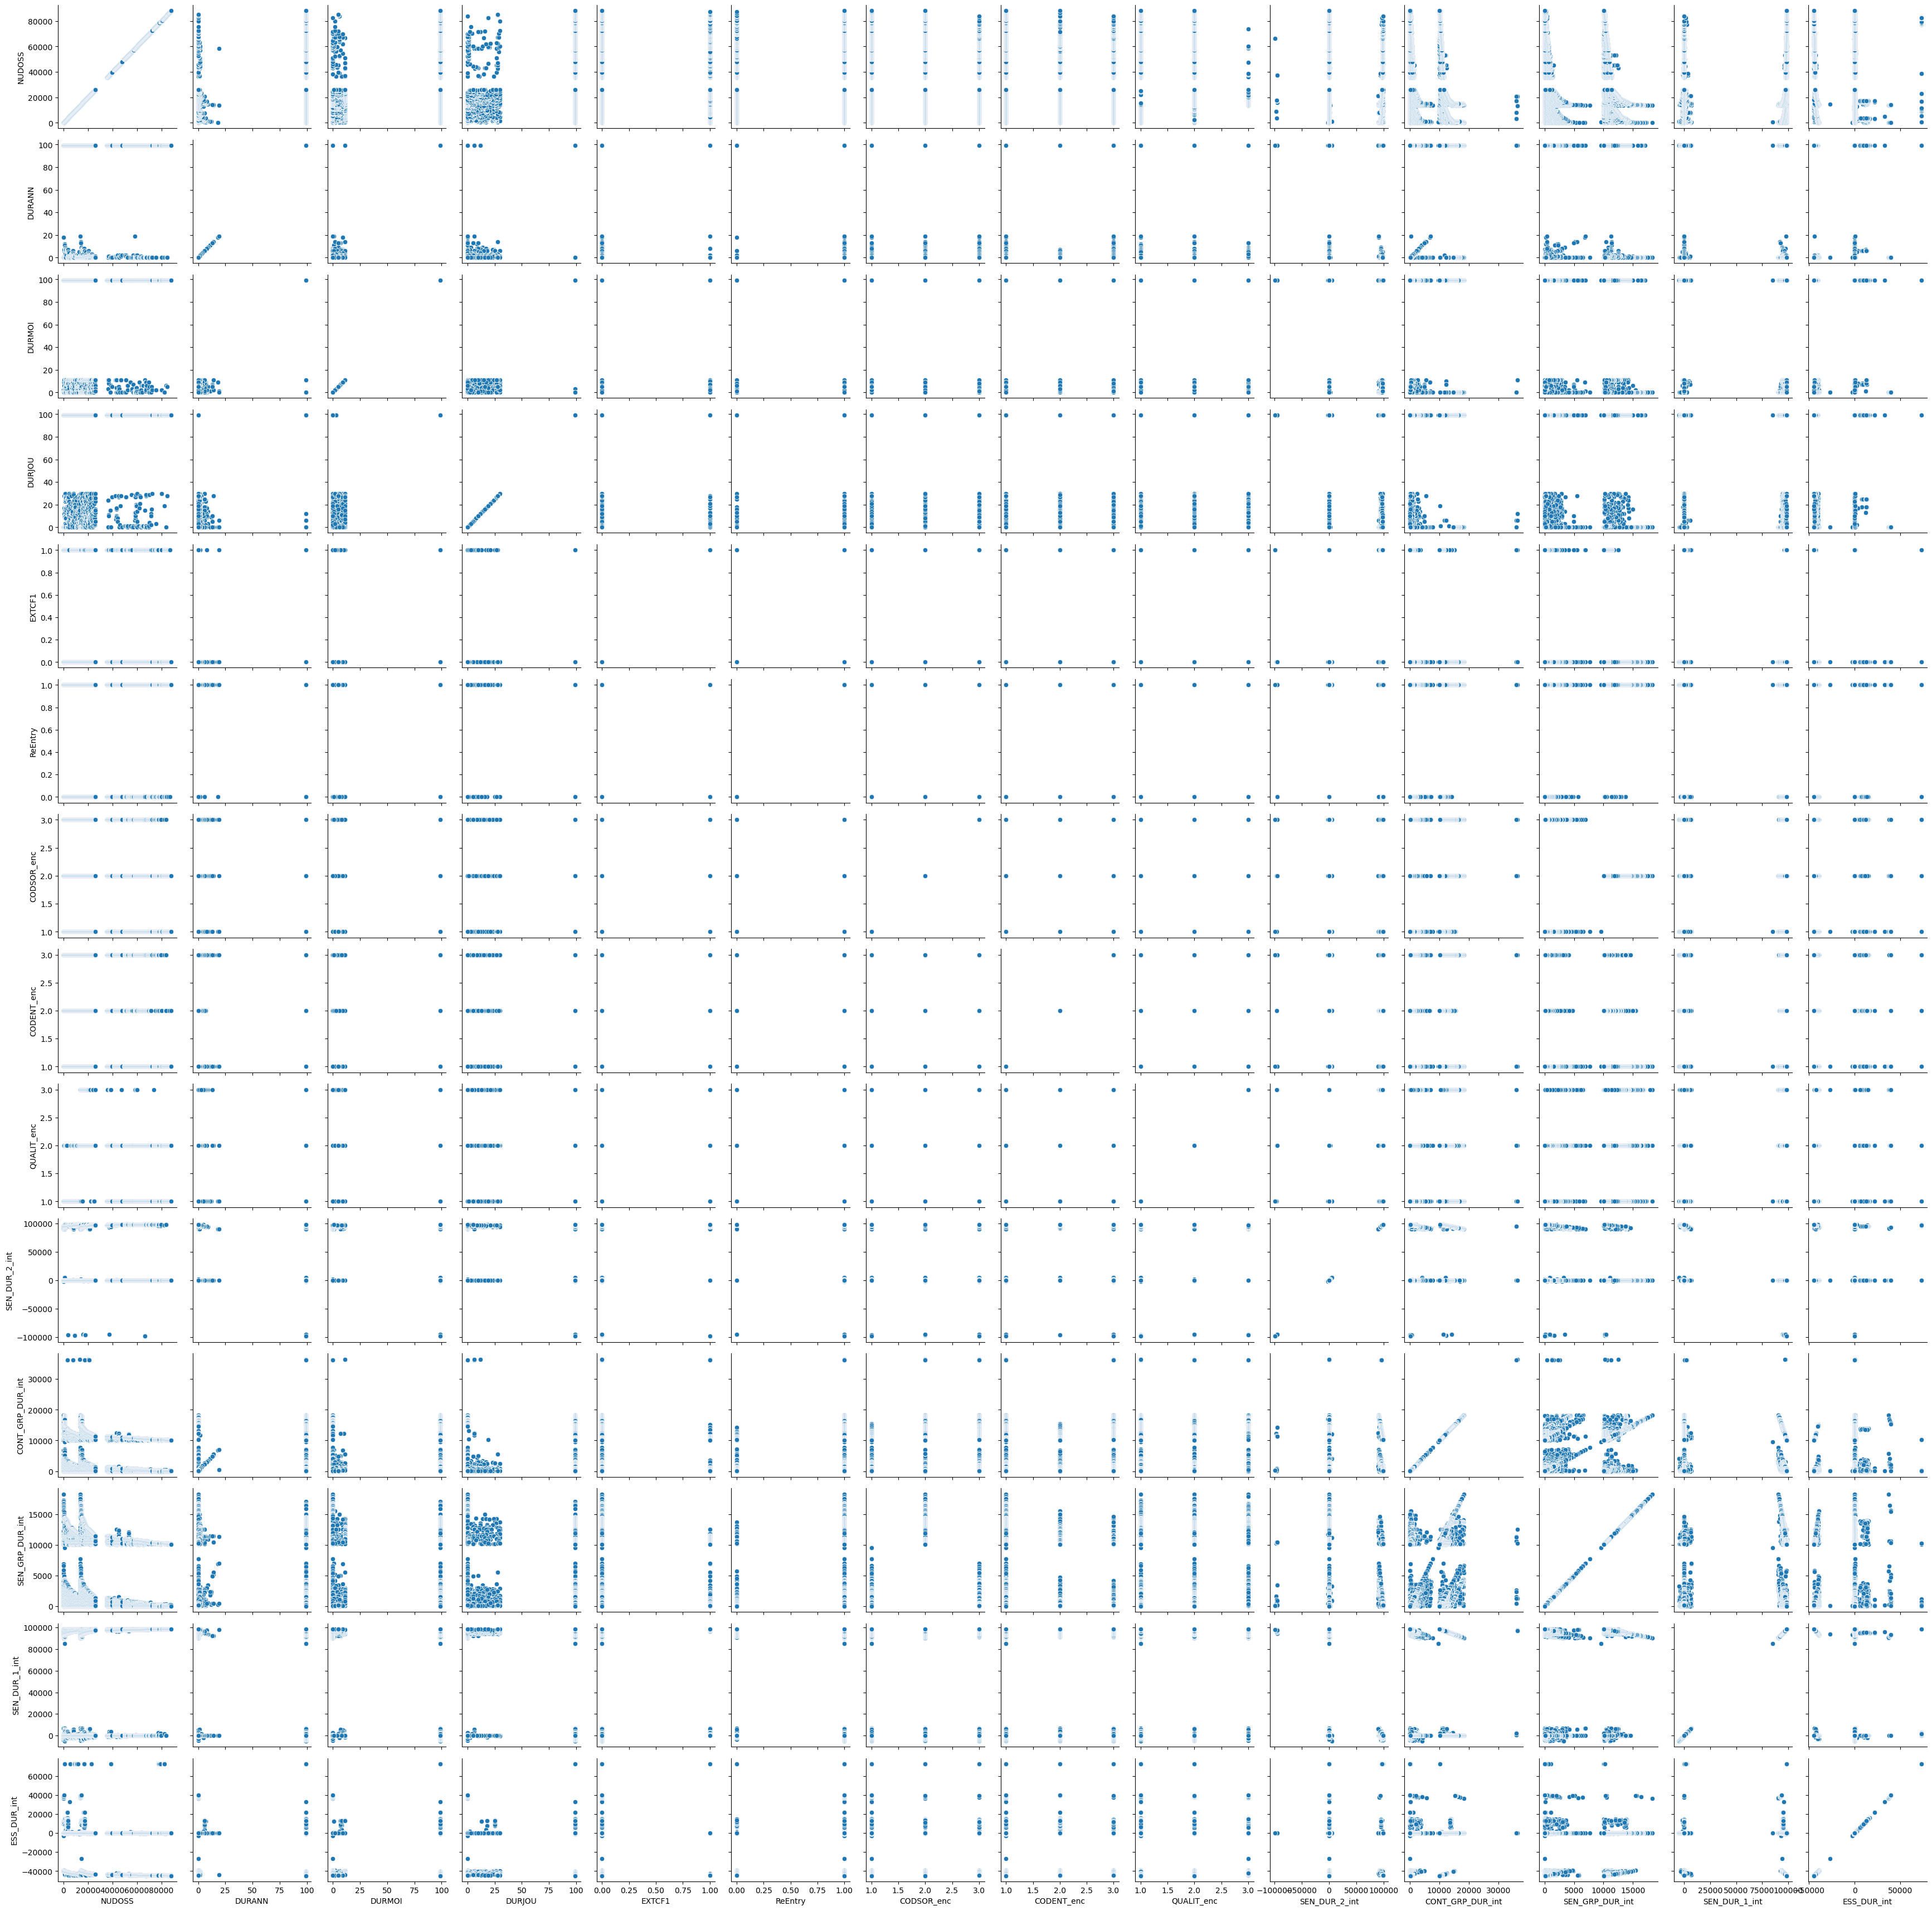

In [111]:
g = sns.PairGrid(df0)
g.map(sns.scatterplot)

In [112]:
cols_all = df0.columns

cols_Date = []
cols_numeric = []
cols_obj = []
cols_bool = []
for col_name in cols_all:
    col_type = df0[col_name].dtype
    if col_type == 'datetime64[ns]':
        cols_Date.append(col_name)
    elif col_type in ['int64', 'int32', 'float64','float32']:
        cols_numeric.append(col_name)
    elif col_type == 'object':
        cols_obj.append(col_name)
    elif col_type == 'bool':
        cols_bool.append(col_name)

In [113]:
#cols_ids = ['MATCLE','NUDOSS']
cols_ids = ['MATCLE']
cols_num_no_ids = [col for col in cols_numeric if col not in cols_ids]

In [114]:
dfi=df0[cols_ids + cols_numeric]

In [116]:
df0['ID'] = df0['ID'].astype(str)

In [119]:
df = df0[cols_num_no_ids + cols_Date]
df1 = df0[cols_num_no_ids]

## Corr matrix

In [122]:
corr_matrix = df1.corr()

## Normalized df : Numerals & Dates

In [125]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()
# sc = StandardScaler()

# Fit and transform the data
df[cols_num_no_ids ] = scaler.fit_transform(df[cols_num_no_ids])


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4036\3326511673.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols_num_no_ids ] = scaler.fit_transform(df[cols_num_no_ids])


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4036\2050533257.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


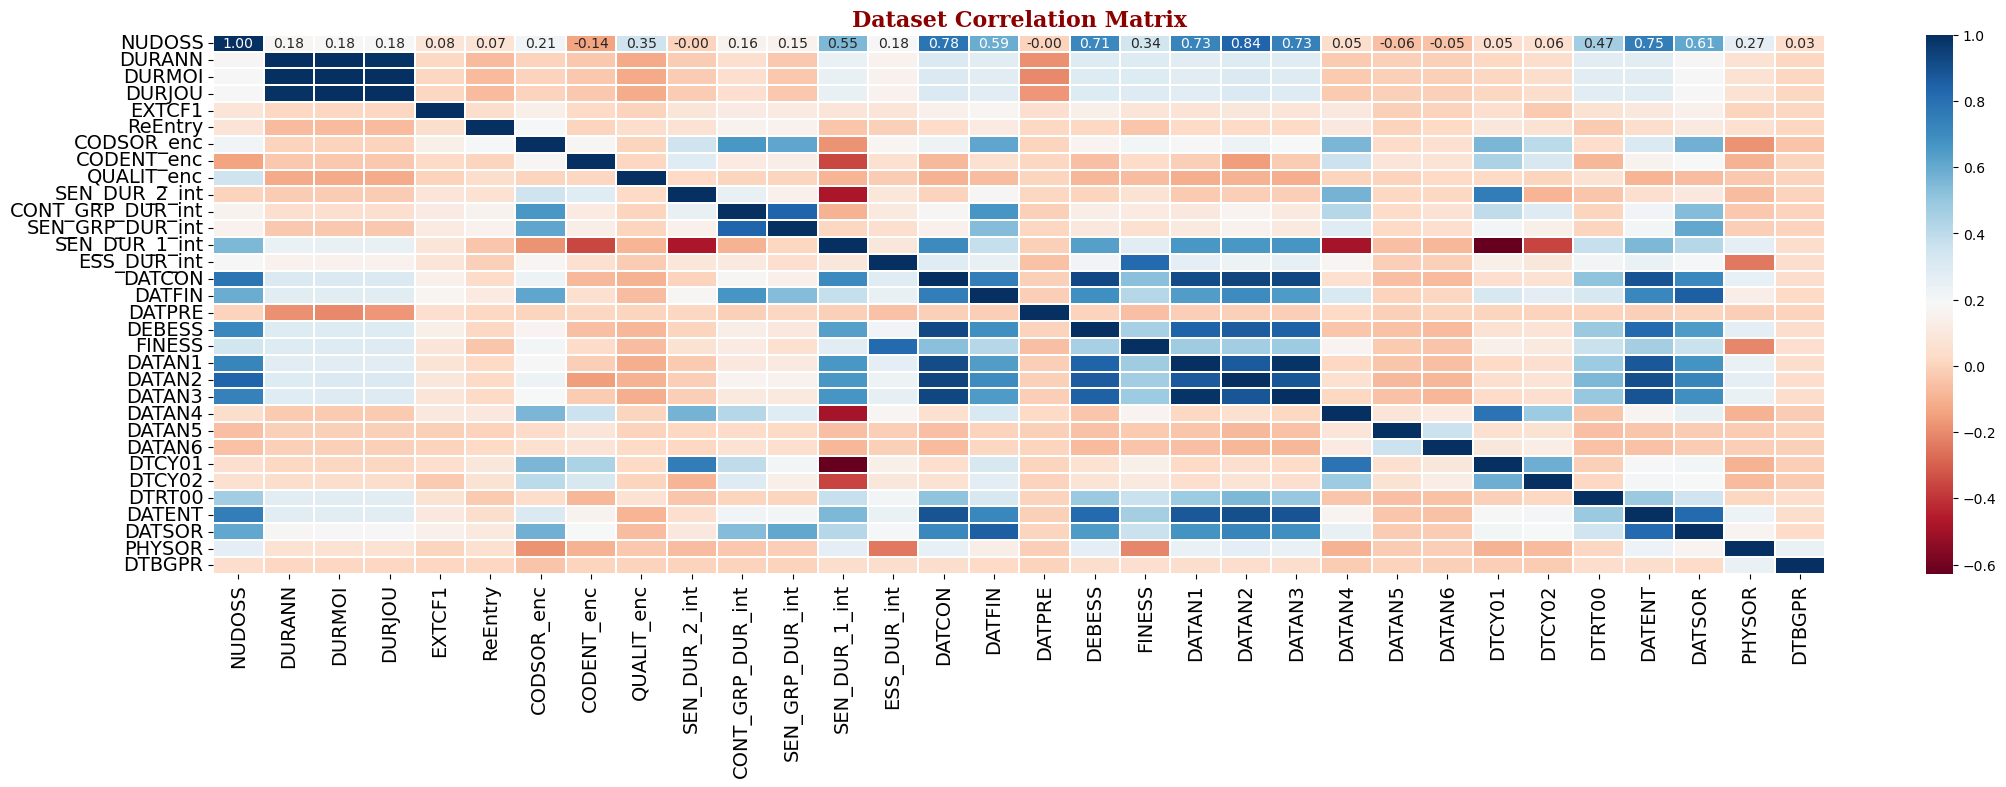

In [126]:
# plot correlation matrix heatmap
axtitle_dict = {'family': 'serif','color':  'darkred','weight': 'bold','size': 16}

fig, ax = plt.subplots(figsize=[26,7])
sns.heatmap(df.corr('spearman'), ax=ax,  annot=True, linewidths=0.05, fmt= '.2f',cmap='RdBu') #kind of correlation->  ‘pearson’, ‘kendall’, ‘spearman’
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title('Dataset Correlation Matrix', fontdict=axtitle_dict)
plt.savefig('correlation_matrix_Misclass_num_date.png')
fig.show()

**Interpretation**

____________________________________
Positively correlated with SEN_GRP_DUR_int : 
- High : CODSOR_enc
__________________________________
Negatively correlated with SEN_DUR_1_int : 
- Highly+ : SEN_DUR_2_int
- Highly : CODENT_enc
- Medium : SEN_GRP_DUR_int
- Lightly : CODSOR_enc  
____________________________________

Negatively correlated with SEN_GRP_DUR_int : 
- High : CODSOR_enc 
- Medium : CODENT_enc
____________________________________
Negatively correlated with DATFIN : 
- Medium+ : SEN_GRP_DUR_int 

Positively correlated with DATFIN : 
- Medium+ : CODSOR_enc, CONT_GRP_DUR_int, DATENT
- Medium++ : DATCON
- Medium- : DEBESS, DATAN1
____________________________________

Negatively correlated with DATCON : 
- Medium+ : SEN_GRP_DUR_int 

Positively correlated with DATCON : 
- Medium+ : CODSOR_enc, CONT_GRP_DUR_int, DATENT, DEBESS, DATAN1
- Medium- : DATFIN, SEN_DUR_1_int


____________________________________

Positively correlated with DEBESS : 
- Highly++ : DATCON
- Highly : DATENT, DATAN1-2-3
- MEdium+ : Sen_DUR_1_int, DATFIN 
___________________________________________
Negatively correlated with FINESS : 
- Medium+ : PHYSOR
- Medium : SEN_GRP_DUR_int
__________________________________________________________________

- DATAN1 & DATAN3 are superposed (exact same variation & correlation with all other variables)
We will only consider DATAN1 in our interpretation.
- DATAN1 & DATAN2 are almost identical in terms of variation & correlation.

- DATAN2 has a slighlty larger correlation for CODENT_enc.


Negatively correlated with DATAN1 : 
- Medium : SEN_GRP_DUR_int

Positively correlated with DATAN1 : 
- Highly : DATENT, DEBESS, DATCON
- Highly- : SEN_DUR_1_int, DATFIN
- Lightly : DRT00

____________________________________

Negatively correlated with DATAN4 : 
- Highly : SEN_DUR_1_int 

Positively correlated with DATAN4 : 
- Medium+ High : DTCY01
- Medium- : DTCY02
- Medium- : SEN_DUR_1_int
- Medium-- : CONT_GRP_DUR_int
_______________________________________

Negatively correlated with DTCY02 : 
- Highly : SEN_DUR_1_int (-0.5)
- Lightly : SEN_DUR_2_int 

Positively correlated with DTCY02 : 
- Medium : DTCY02
- Medium- : DATAN4
- lighter- : CODSOR_enc, CODENT_enc
_______________________________________

Negatively correlated with DTCY01 : 
- Highly : SEN_DUR_1_int (<-0.6)

Positively correlated with DTCY01 : 
- Highly+ : SEN_DUR_2_int (>0.8)
- Highly : DATAN4
- Medium : DTCY02
- lighter- : CODSOR_enc, CODENT_enc
_______________________________________
Negatively correlated with PHYSOR : 
- Medium : CODSOR_enc (-0.4)
- Medium : FINESS 
_______________________________________

Negatively correlated with DATSOR : 
- Medium : CODSOR_enc

Positively correlated with DATSOR : 
- Medium+ : SEN_GRP_DUR_int
_______________________________________

Negatively correlated with DATENT :
- Medium : SEN_GRP_DUR_int
- very lightly : Qualit_enc (Minority class entries)

Positively correlated with DATENT
- NUDOSS : Means that more Entry Dates in recent years correspond to higher values for NUDOSS (which totally natural) - Discard, irrelevant
- Highly+ : DATCON (contract)
- DATAN1, DATAN2, DATAN3
- Medium+ : DEBESS, DATFIN
- Medium : SEN_DUR_1_int
_______________________________________


## Normalized df1 : Numerals 

In [127]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the data
df1[cols_num_no_ids] = scaler.fit_transform(df1[cols_num_no_ids])


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4036\1336190996.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[cols_num_no_ids] = scaler.fit_transform(df1[cols_num_no_ids])


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4036\4087744982.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


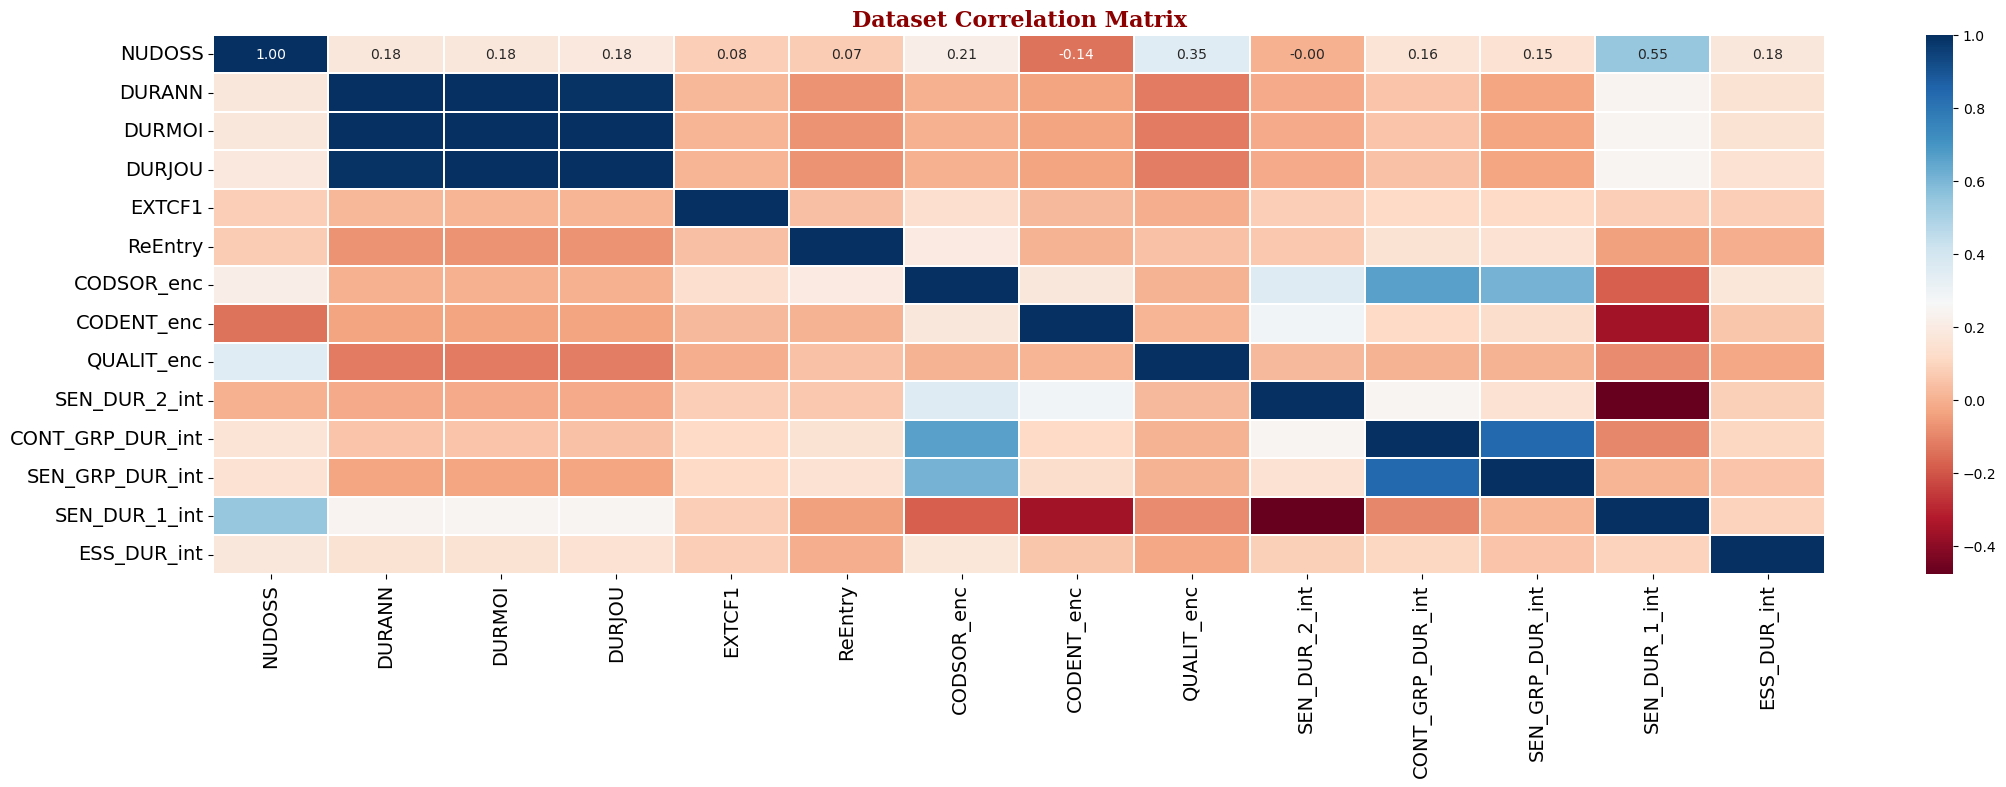

In [128]:
# plot correlation matrix heatmap
axtitle_dict = {'family': 'serif','color':  'darkred','weight': 'bold','size': 16}

fig, ax = plt.subplots(figsize=[26,7])
sns.heatmap(df1.corr('spearman'), ax=ax,  annot=True, linewidths=0.05, fmt= '.2f',cmap='RdBu') #kind of correlation->  ‘pearson’, ‘kendall’, ‘spearman’
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title('Dataset Correlation Matrix', fontdict=axtitle_dict)
plt.savefig('correlation_matrix_Misclass_num.png')
fig.show()

In [129]:
data_cr = preprocessing.scale(df1[cols_num_no_ids])

In [130]:
data_cr

array([[-1.13882784, -3.61342432, -3.66658829, ..., -0.55297968,
         0.35884066, -2.03619751],
       [-1.13882784,  0.27817712,  0.2788293 , ..., -0.55297968,
         0.43354755,  0.25458011],
       [-1.13882784, -3.61342432, -3.66658829, ..., -0.56023678,
         0.35884066, -2.03619751],
       ...,
       [ 2.53083704,  0.27817712,  0.2788293 , ..., -0.56023678,
         0.48967759,  0.25737228],
       [ 2.53083704,  0.27817712,  0.2788293 , ...,  1.7905934 ,
         0.48962052,  0.25737228],
       [ 2.53083704,  0.27817712,  0.2788293 , ...,  1.7905934 ,
         0.48967759,  0.25737228]])

In [131]:
print (f' Mean : {np.mean(data_cr,axis=0)} \n\n Std : {np.std(data_cr,axis=0)}')

 Mean : [-9.06051705e-17  3.22780920e-16 -5.28530161e-17  1.88760772e-16
  2.64265081e-17 -4.15273698e-17  3.77521544e-17 -3.77521544e-18
 -5.66282316e-17  6.87089210e-16  7.55043088e-18  6.04034470e-17
  5.66282316e-17  3.85071975e-16] 

 Std : [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## ACP

In [132]:
PCA = decomposition.PCA(n_components= len(df1.columns))
PCA.fit(df1)

PCA(n_components=14)

In [133]:
n_compo = PCA.n_components_

In [134]:
eigval = PCA.explained_variance_

In [135]:
PCA.explained_variance_ratio_

array([2.54774263e-01, 2.17277977e-01, 1.26542109e-01, 1.09355410e-01,
       8.29615828e-02, 6.65620463e-02, 5.68737856e-02, 3.47566919e-02,
       2.03122486e-02, 1.84571433e-02, 7.28064788e-03, 3.92117934e-03,
       7.20127862e-04, 2.04787242e-04])

In [136]:
eigval.shape

(14,)

## Visualization

### a. Scree plot

In [137]:
n,p = df1.shape

In [138]:
p

14

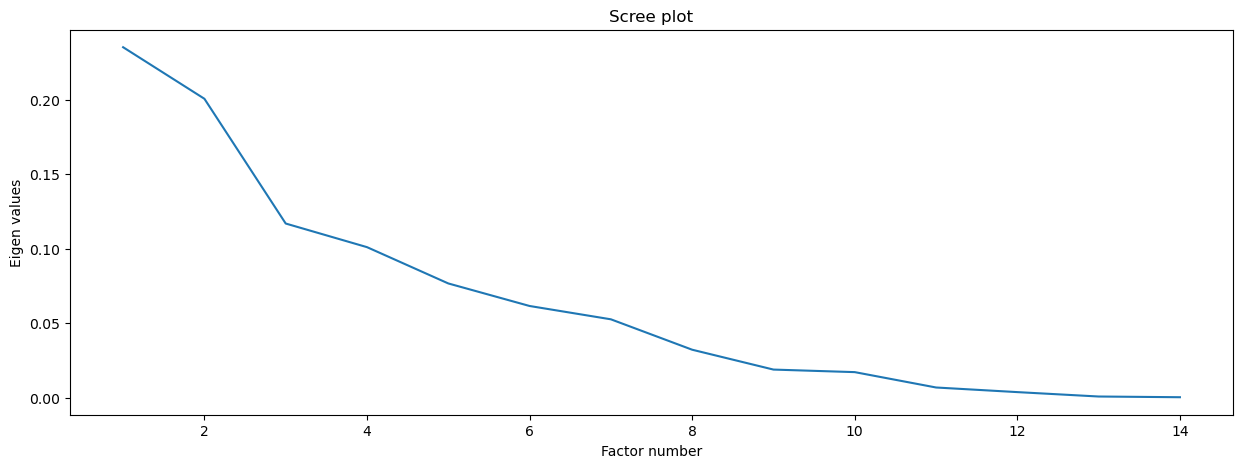

In [139]:
plt.figure(figsize=(15,5))
plt.plot(np.arange(1,n_compo+1),eigval)

plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.savefig('Scree_plot_Misclass_11.png')

plt.show()

### b. Cumul Explained variance 

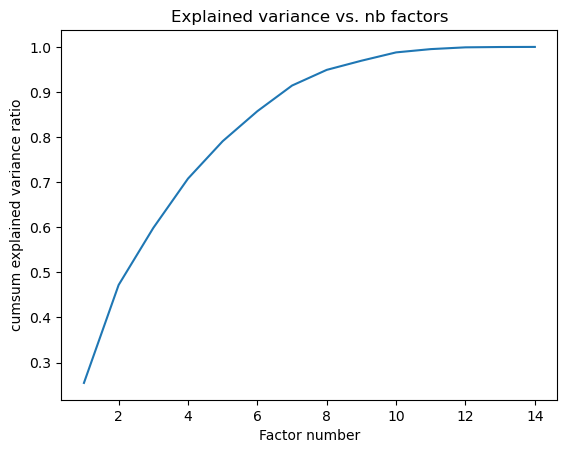

In [140]:
plt.plot(np.arange(1,n_compo+1),np.cumsum(PCA.explained_variance_ratio_))

plt.title("Explained variance vs. nb factors")
plt.ylabel("cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.savefig('Cumul_plot_Misclass_11.png')
#plt.style.context('seaborn-whitegrid')
#plt.axhline(y=80, color='r', linestyle='--')
plt.show()

#### ==> 6 Variables are enough to represent 80% of the data

In [141]:
corvar = np.zeros((n_compo,n_compo)) 
for k in range(n_compo):
    corvar[:,k] = PCA.components_[k,:] * np.sqrt(eigval)[k]
    
corvar.shape

(14, 14)

In [142]:
corvar

array([[ 2.20159450e-02, -6.34594939e-02, -1.77337457e-01,
        -2.39336985e-03,  6.31551807e-02,  8.85615568e-02,
         1.60158588e-01, -1.22927377e-02,  2.40140556e-02,
         9.11655010e-03,  6.03154881e-04,  1.67512357e-04,
        -8.16779178e-05, -5.78427274e-06],
       [-1.61894606e-02, -2.51391806e-01, -1.76664124e-03,
         3.95940218e-02, -1.95209384e-02, -7.04222463e-03,
        -1.45239684e-02,  1.81290342e-03, -7.24861055e-03,
        -1.97135601e-03,  5.80338283e-04,  2.19360178e-03,
        -1.54371506e-02,  7.47512862e-03],
       [-1.63657685e-02, -2.48321834e-01, -2.10353236e-03,
         3.86185615e-02, -1.89973186e-02, -6.76998518e-03,
        -1.43702125e-02,  1.74509766e-05, -7.50175953e-03,
        -2.04040962e-03, -1.27026918e-03, -1.51180532e-03,
        -4.09207907e-03, -1.09826306e-02],
       [-1.47686787e-02, -2.41998229e-01, -2.03602717e-03,
         3.73998377e-02, -1.82494843e-02, -6.50292126e-03,
        -1.27632981e-02,  4.90778072e-04, -7.

In [143]:
pd.DataFrame({'id':df1.columns, 'COR_1':corvar[:,0], 'COR_2':corvar[:,1], 'COR_3':corvar[:,2],
              'COR_4':corvar[:,3],'COR_5':corvar[:,4],'COR_6':corvar[:,5],'COR_7':corvar[:,6],
             'COR_8':corvar[:,7],'COR_9':corvar[:,8]})

,id,COR_1,COR_2,COR_3,COR_4,COR_5,COR_6,COR_7,COR_8,COR_9
0,NUDOSS,0.022016,-0.063459,-0.177337,-0.002393,0.063155,0.088562,0.160159,-0.012293,0.024014
1,DURANN,-0.016189,-0.251392,-0.001767,0.039594,-0.019521,-0.007042,-0.014524,0.001813,-0.007249
2,DURMOI,-0.016366,-0.248322,-0.002104,0.038619,-0.018997,-0.006770,-0.014370,0.000017,-0.007502
3,DURJOU,-0.014769,-0.241998,-0.002036,0.037400,-0.018249,-0.006503,-0.012763,0.000491,-0.007732
4,EXTCF1,0.021755,-0.006610,-0.020716,-0.012616,0.010536,0.015788,-0.003015,0.177417,0.006000
5,ReEntry,0.070296,0.027117,-0.139535,-0.060363,-0.242568,-0.010602,-0.001816,-0.000753,0.006341
6,CODSOR_enc,0.264308,-0.026893,-0.093646,-0.067209,0.076504,-0.072020,-0.044735,-0.006750,-0.027736
7,CODENT_enc,0.200339,0.006159,0.139699,0.072172,-0.055508,0.169521,-0.003357,-0.003090,-0.008641
8,QUALIT_enc,0.016923,0.098068,-0.133029,0.275926,0.005016,-0.020145,-0.044243,0.002864,-0.003691
9,SEN_DUR_2_int,0.096785,-0.001532,0.028153,0.015623,-0.002288,-0.036145,0.034015,0.011090,0.020638


## Correlation circle

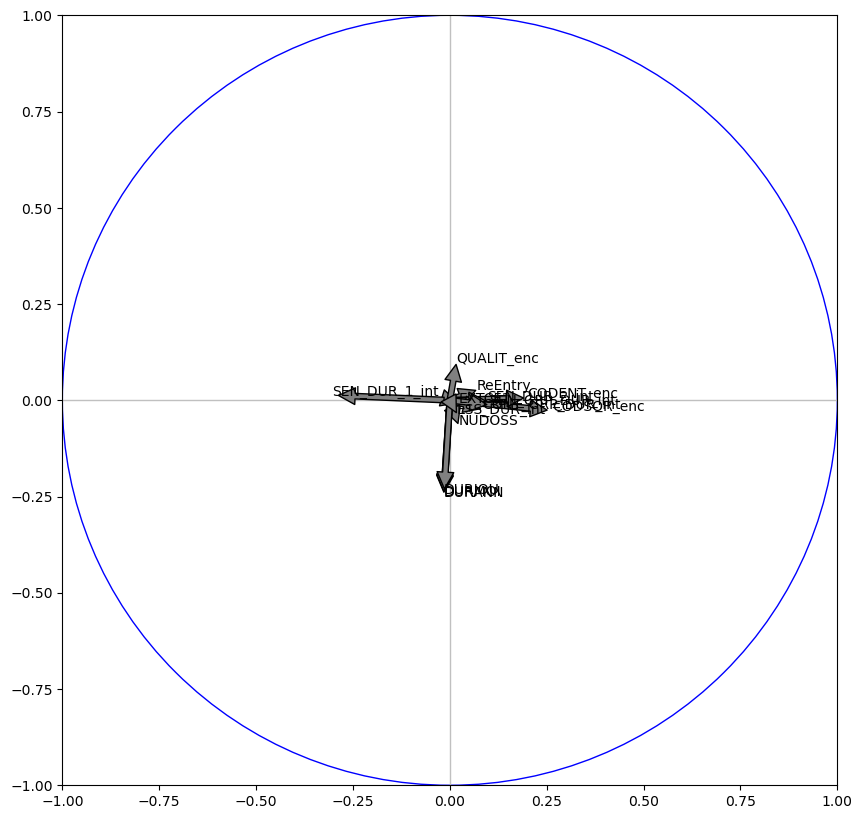

In [144]:
fig,axes = plt.subplots(figsize=(10,10))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)


# Annotating axes with arrows
for j in range(p): 
    plt.annotate('', xy=(corvar[j,0], corvar[j,1]), xytext=(0, 0),
                 arrowprops=dict(facecolor='grey', shrink=0.05))

# Annotating axes
for j in range(p): 
    plt.annotate(df1.columns[j], (corvar[j,0],corvar[j,1]) )
    
# plotting axes & cercle
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

circle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(circle)
plt.savefig('Corr_Circle_Misclass_1.png')

plt.show()

In [145]:
df1.columns

Index(['NUDOSS', 'DURANN', 'DURMOI', 'DURJOU', 'EXTCF1', 'ReEntry',
       'CODSOR_enc', 'CODENT_enc', 'QUALIT_enc', 'SEN_DUR_2_int',
       'CONT_GRP_DUR_int', 'SEN_GRP_DUR_int', 'SEN_DUR_1_int', 'ESS_DUR_int'],
      dtype='object')

## Interpretation 
- DURANN , DURMOI & DURJOU are superposed.
- CODSOR_enc is highly negatively correlated with SEN_DUR_1_int (Seniority in company -1)
- DURANN , DURMOI ; DURJOU && QUALIT_enc are strongly negatively correlated.
- ReEntry & SEN_GRP_DUR_int, SEN_DUR_2_int are superposed.
- CONT_GRP_DUR_int & CODENT_enc & EXTCF1 are superposed.
- CODENT_enc, CODSOR_enc & ReEntry are strongly positively correlated.



## ___________________________ ___ _______________________________ ___ _______________________
### Conclusion to draw regarding the data :
e_CODSOR = { '3' : 3, '0' : 2, '4' : 1}

e_CODENT = { '3' : 3, '2' : 2, '1' : 1}

e_QUALIT = { '3' : 3, '2' : 2, '1' : 1} 

qualit_dict = {1: 'Mr', 2: 'Mrs', 3: 'Miss'}
CODENT_dict = {1: 'New Reccruit', 2: 'ReRecruited', 3: 'Mutation'}
CODSOR_dict = {0: 'Currently IN', 3: 'Mutation', 4: 'Left'}


## Representation Quality of variables

In [146]:
cos2var = corvar**2
pd.DataFrame({'id':df1.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1], 'COS2_3':cos2var[:,2],
              'COS2_4':cos2var[:,3],'COS2_5':cos2var[:,4],'COS2_6':cos2var[:,5],'COS2_7':cos2var[:,6],
             'COS2_8':cos2var[:,7],'COS2_9':cos2var[:,8],'COS2_10':cos2var[:,9],'COS2_11':cos2var[:,10]})

,id,COS2_1,COS2_2,COS2_3,COS2_4,COS2_5,COS2_6,COS2_7,COS2_8,COS2_9,COS2_10,COS2_11
0,NUDOSS,0.000485,0.004027,0.031449,0.000006,0.003989,0.007843,0.025651,1.511114e-04,0.000577,8.311149e-05,3.637958e-07
1,DURANN,0.000262,0.063198,0.000003,0.001568,0.000381,0.000050,0.000211,3.286619e-06,0.000053,3.886245e-06,3.367925e-07
2,DURMOI,0.000268,0.061664,0.000004,0.001491,0.000361,0.000046,0.000207,3.045366e-10,0.000056,4.163271e-06,1.613584e-06
3,DURJOU,0.000218,0.058563,0.000004,0.001399,0.000333,0.000042,0.000163,2.408631e-07,0.000060,3.138571e-06,7.746769e-06
4,EXTCF1,0.000473,0.000044,0.000429,0.000159,0.000111,0.000249,0.000009,3.147676e-02,0.000036,1.292656e-05,1.447700e-05
5,ReEntry,0.004941,0.000735,0.019470,0.003644,0.058839,0.000112,0.000003,5.667280e-07,0.000040,5.164314e-06,1.577337e-07
6,CODSOR_enc,0.069859,0.000723,0.008770,0.004517,0.005853,0.005187,0.002001,4.556376e-05,0.000769,4.341241e-03,5.561933e-04
7,CODENT_enc,0.040136,0.000038,0.019516,0.005209,0.003081,0.028737,0.000011,9.547942e-06,0.000075,1.295662e-03,1.069178e-04
8,QUALIT_enc,0.000286,0.009617,0.017697,0.076135,0.000025,0.000406,0.001957,8.200690e-06,0.000014,1.726260e-07,1.840972e-07
9,SEN_DUR_2_int,0.009367,0.000002,0.000793,0.000244,0.000005,0.001306,0.001157,1.229961e-04,0.000426,4.101133e-03,3.332170e-03


## Contributions

In [147]:
ctrvar = cos2var

for k in range(p):
    ctrvar[:,k] = ctrvar[:,k]/eigval[k]

In [148]:
pd.DataFrame({'id':df1.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1],'CTR_3':ctrvar[:,2],
              'CTR_4':ctrvar[:,3],'CTR_5':ctrvar[:,4],'CTR_6':ctrvar[:,5],'CTR_7':ctrvar[:,6],
             'CTR_8':ctrvar[:,7],'CTR_9':ctrvar[:,8],'CTR_10':ctrvar[:,9],'CTR_11':ctrvar[:,10]
             })

,id,CTR_1,CTR_2,CTR_3,CTR_4,CTR_5,CTR_6,CTR_7,CTR_8,CTR_9,CTR_10,CTR_11
0,NUDOSS,0.002061,0.020075,0.269185,0.000057,0.052075,0.127629,0.488510,4.709161e-03,0.030751,0.004877,0.000054
1,DURANN,0.001114,0.315044,0.000027,0.015528,0.004975,0.000807,0.004017,1.024226e-04,0.002802,0.000228,0.000050
2,DURMOI,0.001139,0.307396,0.000038,0.014772,0.004712,0.000746,0.003933,9.490428e-09,0.003001,0.000244,0.000240
3,DURJOU,0.000927,0.291940,0.000035,0.013854,0.004348,0.000688,0.003102,7.506140e-06,0.003188,0.000184,0.001152
4,EXTCF1,0.002012,0.000218,0.003673,0.001576,0.001449,0.004056,0.000173,9.809261e-01,0.001920,0.000759,0.002154
5,ReEntry,0.021008,0.003666,0.166655,0.036090,0.768200,0.001829,0.000063,1.766123e-05,0.002144,0.000303,0.000023
6,CODSOR_enc,0.296995,0.003605,0.075063,0.044741,0.076415,0.084405,0.038113,1.419927e-03,0.041022,0.254762,0.082745
7,CODENT_enc,0.170631,0.000189,0.167045,0.051592,0.040227,0.467634,0.000215,2.975474e-04,0.003981,0.076035,0.015906
8,QUALIT_enc,0.001218,0.047943,0.151476,0.754102,0.000328,0.006604,0.037279,2.555623e-04,0.000726,0.000010,0.000027
9,SEN_DUR_2_int,0.039824,0.000012,0.006784,0.002417,0.000068,0.021259,0.022035,3.832989e-03,0.022712,0.240671,0.495726


## T-SNE

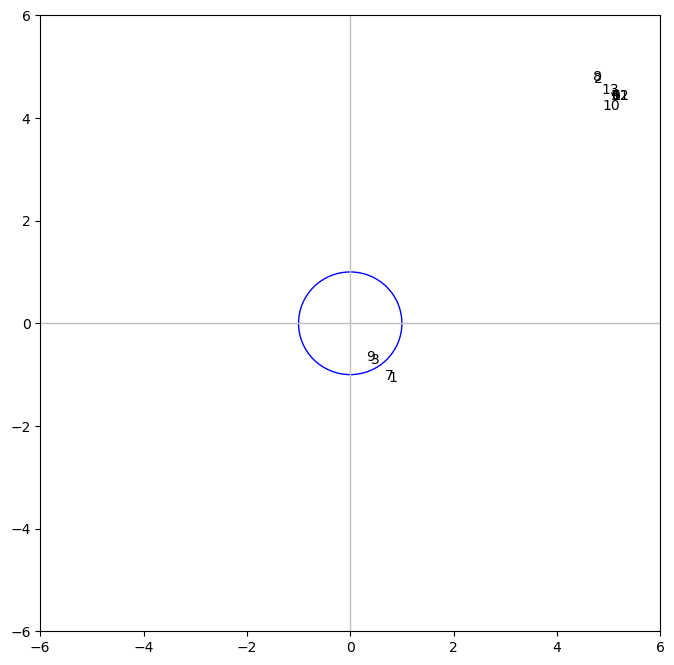

In [149]:
coord = PCA.fit_transform(data_cr)

fig,axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-6,6)
axes.set_ylim(-6,6)

for j in range(p): 
    plt.annotate(df1.index[j], (coord[j,0],coord[j,1]) )
    
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)

circle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(circle)

plt.show()